In [1]:
# handling warnings
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("C:/Users/kumar/Downloads/archive (2)/PUBG_Game_Prediction_data.csv")

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
data.shape

(4446966, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
df=data
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
df.drop(2744604, inplace = True)

In [8]:
# prepare new parameter to know how many players are in a game
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

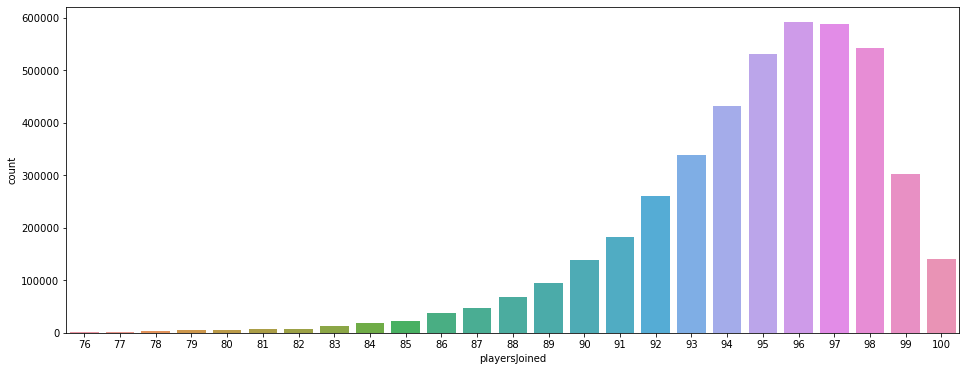

In [9]:
sns.countplot(df[df['playersJoined']>75]['playersJoined'])
plt.show()

In [10]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))
df['killswithoutMoving']

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: killswithoutMoving, Length: 4446965, dtype: bool

In [11]:
df[df['killswithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [12]:
df.drop(df[df['killswithoutMoving'] == True].index , inplace = True)

In [13]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

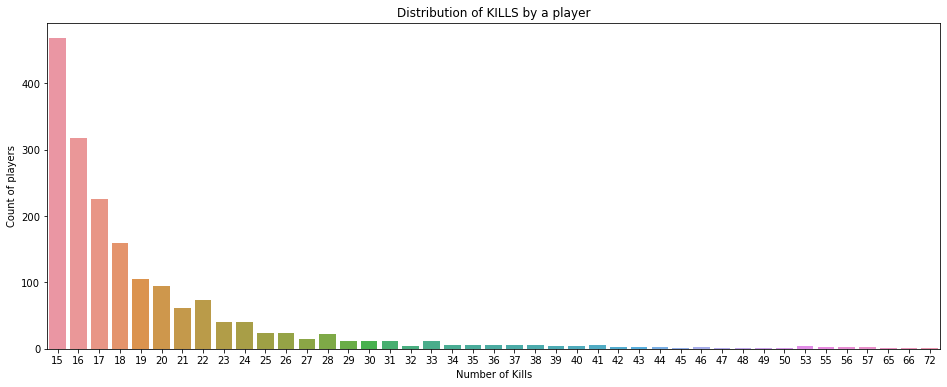

In [14]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [15]:
df[df['kills'] > 20].shape

(417, 32)

In [16]:
df.drop(df[df['kills'] > 20].index, inplace = True)

In [17]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

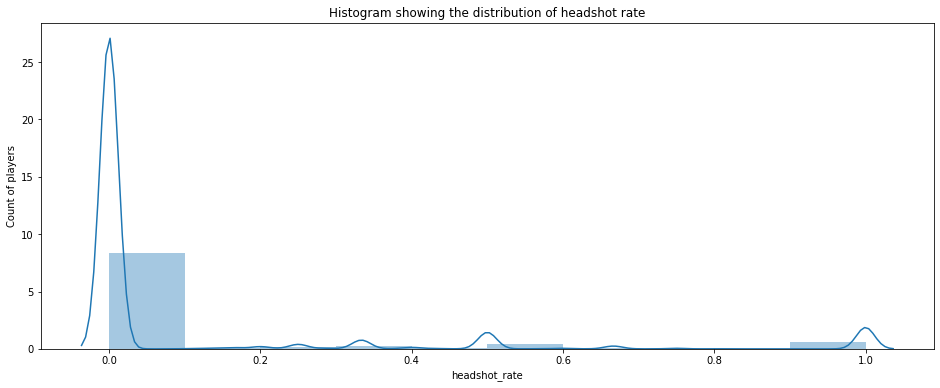

In [18]:
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [19]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [20]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

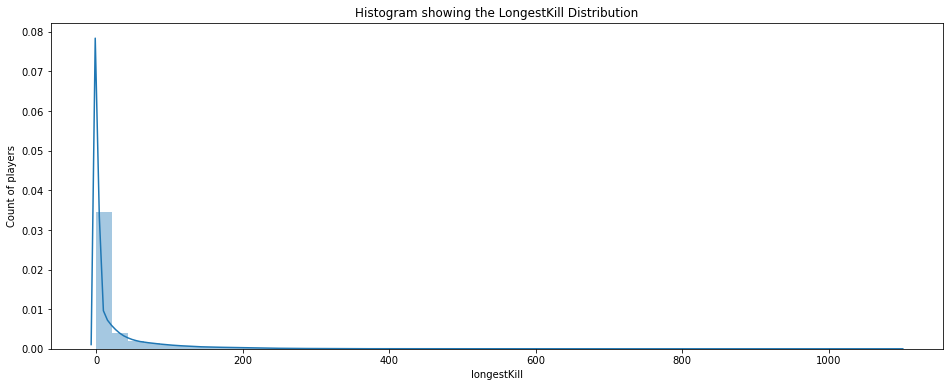

In [21]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [22]:
df[df['longestKill']>=500].shape

(1747, 33)

In [23]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

In [24]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [25]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

In [26]:
df.shape

(4436306, 33)

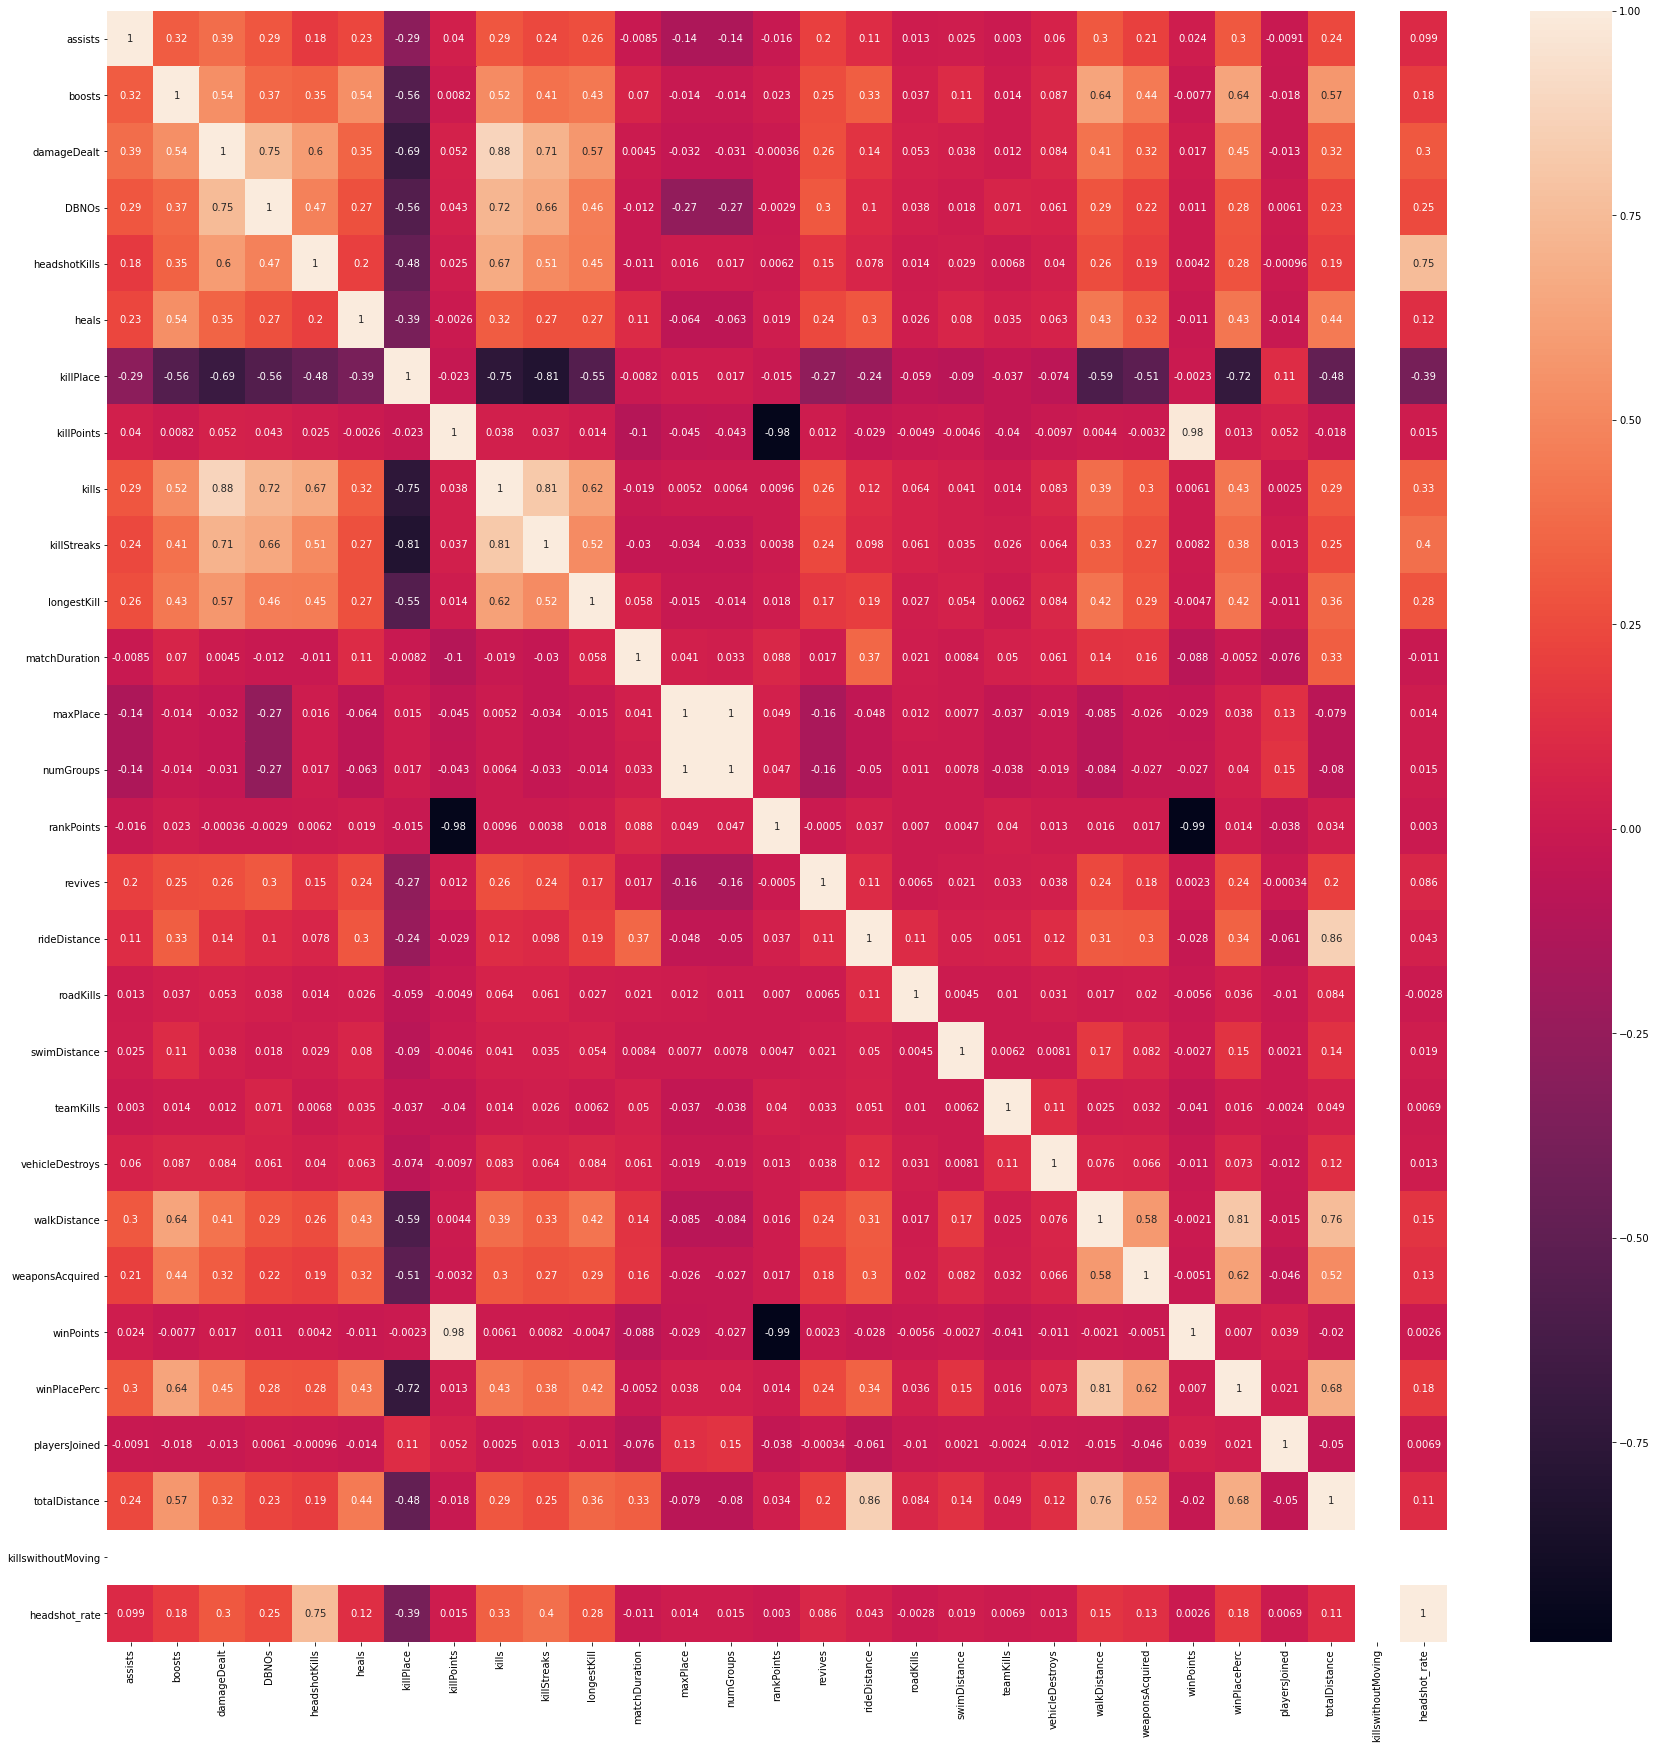

In [27]:
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

In [28]:
#NORMALISING SO THAT ALL THE PLAYERS HAVE EQUAL VALUE
df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving,headshot_rate
assists,1.000000,0.318448,0.385452,0.294815,0.181240,0.228999,-0.290484,0.040285,0.293480,0.237063,...,0.003044,0.059645,0.300586,0.206141,0.023659,0.304743,-0.009131,0.241538,NaN,0.099253
boosts,0.318448,1.000000,0.540234,0.366318,0.345760,0.537559,-0.556009,0.008201,0.522645,0.407962,...,0.013510,0.087186,0.640333,0.439724,-0.007694,0.635048,-0.017681,0.574291,NaN,0.184027
damageDealt,0.385452,0.540234,1.000000,0.748263,0.601082,0.347187,-0.689908,0.051588,0.882602,0.709002,...,0.012171,0.083593,0.412756,0.321433,0.017135,0.450171,-0.013355,0.323709,NaN,0.303221
DBNOs,0.294815,0.366318,0.748263,1.000000,0.471697,0.268101,-0.563304,0.043355,0.723151,0.655128,...,0.070608,0.060893,0.290417,0.216459,0.010692,0.283581,0.006101,0.228854,NaN,0.249178
headshotKills,0.181240,0.345760,0.601082,0.471697,1.000000,0.202160,-0.478737,0.024749,0.665245,0.514886,...,0.006841,0.040100,0.259783,0.194932,0.004200,0.282822,-0.000961,0.194739,NaN,0.751248
heals,0.228999,0.537559,0.347187,0.268101,0.202160,1.000000,-0.386002,-0.002595,0.315765,0.270052,...,0.035017,0.063084,0.431889,0.320882,-0.011227,0.428737,-0.013848,0.440059,NaN,0.122062
killPlace,-0.290484,-0.556009,-0.689908,-0.563304,-0.478737,-0.386002,1.000000,-0.023414,-0.748078,-0.811696,...,-0.037285,-0.073534,-0.591482,-0.511688,-0.002273,-0.719659,0.114358,-0.484073,NaN,-0.386803
killPoints,0.040285,0.008201,0.051588,0.043355,0.024749,-0.002595,-0.023414,1.000000,0.037792,0.037321,...,-0.039752,-0.009704,0.004441,-0.003180,0.983456,0.012916,0.051544,-0.017854,NaN,0.014777
kills,0.293480,0.522645,0.882602,0.723151,0.665245,0.315765,-0.748078,0.037792,1.000000,0.813999,...,0.014364,0.082796,0.390972,0.299690,0.006078,0.430571,0.002469,0.293916,NaN,0.330660
killStreaks,0.237063,0.407962,0.709002,0.655128,0.514886,0.270052,-0.811696,0.037321,0.813999,1.000000,...,0.026499,0.064477,0.329878,0.274586,0.008197,0.377891,0.013468,0.246895,NaN,0.398336


In [29]:
normalising_factor = (100 - df['playersJoined']/100)+1


In [30]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [31]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [32]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [33]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [34]:
#removing alphabetic data
x = pd.get_dummies(x, columns = ['matchType', 'killswithoutMoving'])

In [35]:
x.shape

(4436306, 40)

In [36]:
features = x.columns

In [37]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [38]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [39]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105414, 40) (3105414,)
(1330892, 40) (1330892,)


In [40]:
#catboost
import catboost as cb

In [41]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest, ytest)

In [42]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [43]:
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5482016	test: 0.5479886	best: 0.5479886 (0)	total: 581ms	remaining: 57.5s
1:	learn: 0.5333650	test: 0.5331566	best: 0.5331566 (1)	total: 925ms	remaining: 45.3s
2:	learn: 0.5189826	test: 0.5187815	best: 0.5187815 (2)	total: 1.18s	remaining: 38.1s
3:	learn: 0.5050844	test: 0.5048926	best: 0.5048926 (3)	total: 1.43s	remaining: 34.3s
4:	learn: 0.4916276	test: 0.4914432	best: 0.4914432 (4)	total: 1.71s	remaining: 32.5s
5:	learn: 0.4786251	test: 0.4784449	best: 0.4784449 (5)	total: 2s	remaining: 31.3s
6:	learn: 0.4660267	test: 0.4658539	best: 0.4658539 (6)	total: 2.28s	remaining: 30.3s
7:	learn: 0.4538495	test: 0.4536820	best: 0.4536820 (7)	total: 2.57s	remaining: 29.6s
8:	learn: 0.4420341	test: 0.4418693	best: 0.4418693 (8)	total: 2.88s	remaining: 29.2s
9:	learn: 0.4306331	test: 0.4304748	best: 0.4304748 (9)	total: 3.17s	remaining: 28.6s
10:	learn: 0.4195967	test: 0.4194453	best: 0.4194453 (10)	total: 3.47s	remaining: 28.1s
11:	learn: 0.4089243	test: 0.4087765	best: 0.4087765 (1

94:	learn: 0.1398785	test: 0.1399700	best: 0.1399700 (94)	total: 26.3s	remaining: 1.39s
95:	learn: 0.1394478	test: 0.1395405	best: 0.1395405 (95)	total: 26.6s	remaining: 1.11s
96:	learn: 0.1390753	test: 0.1391697	best: 0.1391697 (96)	total: 26.8s	remaining: 830ms
97:	learn: 0.1387199	test: 0.1388151	best: 0.1388151 (97)	total: 27.1s	remaining: 553ms
98:	learn: 0.1383766	test: 0.1384732	best: 0.1384732 (98)	total: 27.3s	remaining: 276ms
99:	learn: 0.1380397	test: 0.1381367	best: 0.1381367 (99)	total: 27.6s	remaining: 0us

bestTest = 0.1381366755
bestIteration = 99

0:	loss: 0.1381367	best: 0.1381367 (0)	total: 33.5s	remaining: 8m 21s
0:	learn: 0.5126068	test: 0.5124096	best: 0.5124096 (0)	total: 313ms	remaining: 31s
1:	learn: 0.4671679	test: 0.4669991	best: 0.4669991 (1)	total: 598ms	remaining: 29.3s
2:	learn: 0.4264429	test: 0.4262951	best: 0.4262951 (2)	total: 892ms	remaining: 28.8s
3:	learn: 0.3902182	test: 0.3900853	best: 0.3900853 (3)	total: 1.18s	remaining: 28.2s
4:	learn: 0.35816

87:	learn: 0.1175203	test: 0.1177555	best: 0.1177555 (87)	total: 23.4s	remaining: 3.19s
88:	learn: 0.1174285	test: 0.1176647	best: 0.1176647 (88)	total: 23.7s	remaining: 2.93s
89:	learn: 0.1171031	test: 0.1173483	best: 0.1173483 (89)	total: 24s	remaining: 2.66s
90:	learn: 0.1170075	test: 0.1172519	best: 0.1172519 (90)	total: 24.3s	remaining: 2.4s
91:	learn: 0.1169191	test: 0.1171636	best: 0.1171636 (91)	total: 24.5s	remaining: 2.13s
92:	learn: 0.1168242	test: 0.1170669	best: 0.1170669 (92)	total: 24.8s	remaining: 1.86s
93:	learn: 0.1167374	test: 0.1169829	best: 0.1169829 (93)	total: 25s	remaining: 1.6s
94:	learn: 0.1166427	test: 0.1168850	best: 0.1168850 (94)	total: 25.3s	remaining: 1.33s
95:	learn: 0.1165224	test: 0.1167628	best: 0.1167628 (95)	total: 25.6s	remaining: 1.07s
96:	learn: 0.1164136	test: 0.1166544	best: 0.1166544 (96)	total: 25.8s	remaining: 799ms
97:	learn: 0.1163231	test: 0.1165631	best: 0.1165631 (97)	total: 26.1s	remaining: 533ms
98:	learn: 0.1162409	test: 0.1164784	b

80:	learn: 0.1473270	test: 0.1474090	best: 0.1474090 (80)	total: 22.1s	remaining: 18.8s
81:	learn: 0.1466753	test: 0.1467577	best: 0.1467577 (81)	total: 22.4s	remaining: 18.6s
82:	learn: 0.1459917	test: 0.1460750	best: 0.1460750 (82)	total: 22.6s	remaining: 18.3s
83:	learn: 0.1453945	test: 0.1454773	best: 0.1454773 (83)	total: 22.9s	remaining: 18s
84:	learn: 0.1448061	test: 0.1448892	best: 0.1448892 (84)	total: 23.1s	remaining: 17.7s
85:	learn: 0.1441889	test: 0.1442730	best: 0.1442730 (85)	total: 23.4s	remaining: 17.4s
86:	learn: 0.1436574	test: 0.1437424	best: 0.1437424 (86)	total: 23.7s	remaining: 17.2s
87:	learn: 0.1431242	test: 0.1432099	best: 0.1432099 (87)	total: 23.9s	remaining: 16.9s
88:	learn: 0.1425612	test: 0.1426476	best: 0.1426476 (88)	total: 24.2s	remaining: 16.6s
89:	learn: 0.1420826	test: 0.1421694	best: 0.1421694 (89)	total: 24.5s	remaining: 16.3s
90:	learn: 0.1416257	test: 0.1417131	best: 0.1417131 (90)	total: 24.7s	remaining: 16s
91:	learn: 0.1411888	test: 0.1412785

22:	learn: 0.1488083	test: 0.1488995	best: 0.1488995 (22)	total: 6.31s	remaining: 34.8s
23:	learn: 0.1465172	test: 0.1466110	best: 0.1466110 (23)	total: 6.56s	remaining: 34.4s
24:	learn: 0.1445245	test: 0.1446326	best: 0.1446326 (24)	total: 6.82s	remaining: 34.1s
25:	learn: 0.1428209	test: 0.1429318	best: 0.1429318 (25)	total: 7.09s	remaining: 33.8s
26:	learn: 0.1411019	test: 0.1412206	best: 0.1412206 (26)	total: 7.36s	remaining: 33.5s
27:	learn: 0.1397763	test: 0.1398917	best: 0.1398917 (27)	total: 7.62s	remaining: 33.2s
28:	learn: 0.1385976	test: 0.1387311	best: 0.1387311 (28)	total: 7.88s	remaining: 32.9s
29:	learn: 0.1374581	test: 0.1375932	best: 0.1375932 (29)	total: 8.16s	remaining: 32.7s
30:	learn: 0.1362990	test: 0.1364387	best: 0.1364387 (30)	total: 8.44s	remaining: 32.4s
31:	learn: 0.1354159	test: 0.1355534	best: 0.1355534 (31)	total: 8.69s	remaining: 32s
32:	learn: 0.1346504	test: 0.1347928	best: 0.1347928 (32)	total: 8.94s	remaining: 31.7s
33:	learn: 0.1337834	test: 0.13392

116:	learn: 0.1137482	test: 0.1139813	best: 0.1139813 (116)	total: 30.9s	remaining: 8.71s
117:	learn: 0.1136866	test: 0.1139187	best: 0.1139187 (117)	total: 31.1s	remaining: 8.45s
118:	learn: 0.1135590	test: 0.1137919	best: 0.1137919 (118)	total: 31.4s	remaining: 8.18s
119:	learn: 0.1134379	test: 0.1136698	best: 0.1136698 (119)	total: 31.6s	remaining: 7.91s
120:	learn: 0.1133694	test: 0.1135985	best: 0.1135985 (120)	total: 31.9s	remaining: 7.64s
121:	learn: 0.1133185	test: 0.1135468	best: 0.1135468 (121)	total: 32.1s	remaining: 7.37s
122:	learn: 0.1132164	test: 0.1134445	best: 0.1134445 (122)	total: 32.4s	remaining: 7.11s
123:	learn: 0.1131634	test: 0.1133929	best: 0.1133929 (123)	total: 32.6s	remaining: 6.84s
124:	learn: 0.1128980	test: 0.1131247	best: 0.1131247 (124)	total: 32.9s	remaining: 6.58s
125:	learn: 0.1126908	test: 0.1129179	best: 0.1129179 (125)	total: 33.2s	remaining: 6.33s
126:	learn: 0.1125661	test: 0.1127893	best: 0.1127893 (126)	total: 33.5s	remaining: 6.06s
127:	learn

58:	learn: 0.1565743	test: 0.1566936	best: 0.1566936 (58)	total: 23.4s	remaining: 16.3s
59:	learn: 0.1547252	test: 0.1548482	best: 0.1548482 (59)	total: 23.8s	remaining: 15.9s
60:	learn: 0.1529240	test: 0.1530538	best: 0.1530538 (60)	total: 24.2s	remaining: 15.5s
61:	learn: 0.1512431	test: 0.1513749	best: 0.1513749 (61)	total: 24.6s	remaining: 15.1s
62:	learn: 0.1496426	test: 0.1497763	best: 0.1497763 (62)	total: 25s	remaining: 14.7s
63:	learn: 0.1480579	test: 0.1481975	best: 0.1481975 (63)	total: 25.4s	remaining: 14.3s
64:	learn: 0.1465855	test: 0.1467283	best: 0.1467283 (64)	total: 25.8s	remaining: 13.9s
65:	learn: 0.1451749	test: 0.1453197	best: 0.1453197 (65)	total: 26.1s	remaining: 13.5s
66:	learn: 0.1437990	test: 0.1439497	best: 0.1439497 (66)	total: 26.5s	remaining: 13.1s
67:	learn: 0.1425113	test: 0.1426640	best: 0.1426640 (67)	total: 26.9s	remaining: 12.7s
68:	learn: 0.1412931	test: 0.1414479	best: 0.1414479 (68)	total: 27.2s	remaining: 12.2s
69:	learn: 0.1401193	test: 0.14027

51:	learn: 0.1059271	test: 0.1061752	best: 0.1061752 (51)	total: 19.8s	remaining: 18.3s
52:	learn: 0.1057337	test: 0.1059811	best: 0.1059811 (52)	total: 20.2s	remaining: 17.9s
53:	learn: 0.1053066	test: 0.1055544	best: 0.1055544 (53)	total: 20.6s	remaining: 17.5s
54:	learn: 0.1051164	test: 0.1053633	best: 0.1053633 (54)	total: 21s	remaining: 17.2s
55:	learn: 0.1047146	test: 0.1049609	best: 0.1049609 (55)	total: 21.4s	remaining: 16.8s
56:	learn: 0.1043936	test: 0.1046379	best: 0.1046379 (56)	total: 21.7s	remaining: 16.4s
57:	learn: 0.1039827	test: 0.1042228	best: 0.1042228 (57)	total: 22.1s	remaining: 16s
58:	learn: 0.1036741	test: 0.1039153	best: 0.1039153 (58)	total: 22.5s	remaining: 15.6s
59:	learn: 0.1035171	test: 0.1037603	best: 0.1037603 (59)	total: 22.8s	remaining: 15.2s
60:	learn: 0.1033076	test: 0.1035475	best: 0.1035475 (60)	total: 23.1s	remaining: 14.8s
61:	learn: 0.1031737	test: 0.1034118	best: 0.1034118 (61)	total: 23.5s	remaining: 14.4s
62:	learn: 0.1030069	test: 0.1032452

44:	learn: 0.1925994	test: 0.1926430	best: 0.1926430 (44)	total: 17.5s	remaining: 40.8s
45:	learn: 0.1892423	test: 0.1892942	best: 0.1892942 (45)	total: 17.9s	remaining: 40.5s
46:	learn: 0.1861207	test: 0.1861755	best: 0.1861755 (46)	total: 18.3s	remaining: 40.1s
47:	learn: 0.1831541	test: 0.1832117	best: 0.1832117 (47)	total: 18.7s	remaining: 39.7s
48:	learn: 0.1802725	test: 0.1803352	best: 0.1803352 (48)	total: 19.1s	remaining: 39.4s
49:	learn: 0.1774256	test: 0.1774946	best: 0.1774946 (49)	total: 19.5s	remaining: 39s
50:	learn: 0.1747731	test: 0.1748430	best: 0.1748430 (50)	total: 19.9s	remaining: 38.6s
51:	learn: 0.1720982	test: 0.1721771	best: 0.1721771 (51)	total: 20.3s	remaining: 38.2s
52:	learn: 0.1696361	test: 0.1697189	best: 0.1697189 (52)	total: 20.7s	remaining: 37.8s
53:	learn: 0.1672795	test: 0.1673655	best: 0.1673655 (53)	total: 21s	remaining: 37.4s
54:	learn: 0.1649087	test: 0.1650046	best: 0.1650046 (54)	total: 21.4s	remaining: 37s
55:	learn: 0.1626477	test: 0.1627526	b

137:	learn: 0.1109696	test: 0.1112053	best: 0.1112053 (137)	total: 51.2s	remaining: 4.45s
138:	learn: 0.1108335	test: 0.1110702	best: 0.1110702 (138)	total: 51.5s	remaining: 4.08s
139:	learn: 0.1107175	test: 0.1109536	best: 0.1109536 (139)	total: 51.8s	remaining: 3.7s
140:	learn: 0.1106114	test: 0.1108466	best: 0.1108466 (140)	total: 52.1s	remaining: 3.33s
141:	learn: 0.1103944	test: 0.1106285	best: 0.1106285 (141)	total: 52.5s	remaining: 2.96s
142:	learn: 0.1102008	test: 0.1104337	best: 0.1104337 (142)	total: 52.8s	remaining: 2.59s
143:	learn: 0.1100776	test: 0.1103110	best: 0.1103110 (143)	total: 53.2s	remaining: 2.21s
144:	learn: 0.1099620	test: 0.1101960	best: 0.1101960 (144)	total: 53.5s	remaining: 1.84s
145:	learn: 0.1098644	test: 0.1100969	best: 0.1100969 (145)	total: 53.9s	remaining: 1.48s
146:	learn: 0.1097366	test: 0.1099716	best: 0.1099716 (146)	total: 54.3s	remaining: 1.11s
147:	learn: 0.1095367	test: 0.1097692	best: 0.1097692 (147)	total: 54.7s	remaining: 739ms
148:	learn:

77:	learn: 0.0991833	test: 0.0994129	best: 0.0994129 (77)	total: 4m 17s	remaining: 3m 58s
78:	learn: 0.0988511	test: 0.0990618	best: 0.0990618 (78)	total: 4m 18s	remaining: 3m 52s
79:	learn: 0.0987011	test: 0.0989162	best: 0.0989162 (79)	total: 4m 18s	remaining: 3m 46s
80:	learn: 0.0985275	test: 0.0987448	best: 0.0987448 (80)	total: 4m 19s	remaining: 3m 40s
81:	learn: 0.0982362	test: 0.0984568	best: 0.0984568 (81)	total: 4m 19s	remaining: 3m 35s
82:	learn: 0.0980196	test: 0.0982413	best: 0.0982413 (82)	total: 4m 20s	remaining: 3m 29s
83:	learn: 0.0977331	test: 0.0979529	best: 0.0979529 (83)	total: 4m 20s	remaining: 3m 24s
84:	learn: 0.0976298	test: 0.0978501	best: 0.0978501 (84)	total: 4m 20s	remaining: 3m 19s
85:	learn: 0.0974253	test: 0.0976420	best: 0.0976420 (85)	total: 4m 21s	remaining: 3m 14s
86:	learn: 0.0973126	test: 0.0975291	best: 0.0975291 (86)	total: 4m 21s	remaining: 3m 9s
87:	learn: 0.0970818	test: 0.0973001	best: 0.0973001 (87)	total: 4m 22s	remaining: 3m 4s
88:	learn: 0

17:	learn: 0.3429798	test: 0.3429173	best: 0.3429173 (17)	total: 9.88s	remaining: 45s
18:	learn: 0.3341303	test: 0.3340735	best: 0.3340735 (18)	total: 10.5s	remaining: 44.6s
19:	learn: 0.3255881	test: 0.3255371	best: 0.3255371 (19)	total: 11s	remaining: 43.9s
20:	learn: 0.3173021	test: 0.3172580	best: 0.3172580 (20)	total: 11.5s	remaining: 43.3s
21:	learn: 0.3092648	test: 0.3092271	best: 0.3092271 (21)	total: 12s	remaining: 42.6s
22:	learn: 0.3014865	test: 0.3014565	best: 0.3014565 (22)	total: 12.6s	remaining: 42.1s
23:	learn: 0.2939546	test: 0.2939333	best: 0.2939333 (23)	total: 13.1s	remaining: 41.6s
24:	learn: 0.2867370	test: 0.2867260	best: 0.2867260 (24)	total: 13.7s	remaining: 41s
25:	learn: 0.2797472	test: 0.2797405	best: 0.2797405 (25)	total: 14.2s	remaining: 40.5s
26:	learn: 0.2729818	test: 0.2729849	best: 0.2729849 (26)	total: 14.8s	remaining: 40s
27:	learn: 0.2664793	test: 0.2664859	best: 0.2664859 (27)	total: 15.3s	remaining: 39.4s
28:	learn: 0.2601959	test: 0.2602075	best:

10:	learn: 0.2121735	test: 0.2122388	best: 0.2122388 (10)	total: 5.76s	remaining: 46.6s
11:	learn: 0.1977071	test: 0.1977908	best: 0.1977908 (11)	total: 6.26s	remaining: 45.9s
12:	learn: 0.1851204	test: 0.1852339	best: 0.1852339 (12)	total: 6.79s	remaining: 45.5s
13:	learn: 0.1739991	test: 0.1741282	best: 0.1741282 (13)	total: 7.3s	remaining: 44.9s
14:	learn: 0.1640824	test: 0.1642378	best: 0.1642378 (14)	total: 7.85s	remaining: 44.5s
15:	learn: 0.1557057	test: 0.1558775	best: 0.1558775 (15)	total: 8.39s	remaining: 44s
16:	learn: 0.1484102	test: 0.1485928	best: 0.1485928 (16)	total: 8.84s	remaining: 43.2s
17:	learn: 0.1419283	test: 0.1421237	best: 0.1421237 (17)	total: 9.34s	remaining: 42.5s
18:	learn: 0.1364371	test: 0.1366396	best: 0.1366396 (18)	total: 9.91s	remaining: 42.3s
19:	learn: 0.1314803	test: 0.1316934	best: 0.1316934 (19)	total: 10.4s	remaining: 41.7s
20:	learn: 0.1274223	test: 0.1276467	best: 0.1276467 (20)	total: 10.9s	remaining: 41.1s
21:	learn: 0.1237700	test: 0.123984

3:	learn: 0.5030552	test: 0.5028769	best: 0.5028769 (3)	total: 2.18s	remaining: 1m 19s
4:	learn: 0.4890948	test: 0.4889237	best: 0.4889237 (4)	total: 2.72s	remaining: 1m 19s
5:	learn: 0.4756002	test: 0.4754355	best: 0.4754355 (5)	total: 3.25s	remaining: 1m 17s
6:	learn: 0.4624478	test: 0.4622916	best: 0.4622916 (6)	total: 3.78s	remaining: 1m 17s
7:	learn: 0.4497353	test: 0.4495912	best: 0.4495912 (7)	total: 4.35s	remaining: 1m 17s
8:	learn: 0.4374241	test: 0.4372895	best: 0.4372895 (8)	total: 4.88s	remaining: 1m 16s
9:	learn: 0.4255777	test: 0.4254489	best: 0.4254489 (9)	total: 5.4s	remaining: 1m 15s
10:	learn: 0.4140651	test: 0.4139424	best: 0.4139424 (10)	total: 5.9s	remaining: 1m 14s
11:	learn: 0.4029057	test: 0.4027910	best: 0.4027910 (11)	total: 6.45s	remaining: 1m 14s
12:	learn: 0.3920894	test: 0.3919864	best: 0.3919864 (12)	total: 7.01s	remaining: 1m 13s
13:	learn: 0.3816098	test: 0.3815163	best: 0.3815163 (13)	total: 7.56s	remaining: 1m 13s
14:	learn: 0.3714752	test: 0.3713921	

97:	learn: 0.1098237	test: 0.1100464	best: 0.1100464 (97)	total: 50.2s	remaining: 26.6s
98:	learn: 0.1094566	test: 0.1096822	best: 0.1096822 (98)	total: 50.6s	remaining: 26.1s
99:	learn: 0.1090928	test: 0.1093182	best: 0.1093182 (99)	total: 51.1s	remaining: 25.5s
100:	learn: 0.1087415	test: 0.1089684	best: 0.1089684 (100)	total: 51.5s	remaining: 25s
101:	learn: 0.1083943	test: 0.1086202	best: 0.1086202 (101)	total: 52s	remaining: 24.5s
102:	learn: 0.1080116	test: 0.1082367	best: 0.1082367 (102)	total: 52.5s	remaining: 24s
103:	learn: 0.1077005	test: 0.1079272	best: 0.1079272 (103)	total: 53s	remaining: 23.4s
104:	learn: 0.1073484	test: 0.1075748	best: 0.1075748 (104)	total: 53.5s	remaining: 22.9s
105:	learn: 0.1070700	test: 0.1072966	best: 0.1072966 (105)	total: 54s	remaining: 22.4s
106:	learn: 0.1067565	test: 0.1069852	best: 0.1069852 (106)	total: 54.5s	remaining: 21.9s
107:	learn: 0.1064957	test: 0.1067232	best: 0.1067232 (107)	total: 54.9s	remaining: 21.4s
108:	learn: 0.1062381	test

38:	learn: 0.1004476	test: 0.1006920	best: 0.1006920 (38)	total: 20.7s	remaining: 59s
39:	learn: 0.1000889	test: 0.1003335	best: 0.1003335 (39)	total: 21.1s	remaining: 58.1s
40:	learn: 0.0995718	test: 0.0998175	best: 0.0998175 (40)	total: 21.7s	remaining: 57.6s
41:	learn: 0.0991263	test: 0.0993770	best: 0.0993770 (41)	total: 22.2s	remaining: 57s
42:	learn: 0.0988512	test: 0.0991016	best: 0.0991016 (42)	total: 22.6s	remaining: 56.3s
43:	learn: 0.0984001	test: 0.0986402	best: 0.0986402 (43)	total: 23.1s	remaining: 55.6s
44:	learn: 0.0980017	test: 0.0982420	best: 0.0982420 (44)	total: 23.6s	remaining: 55s
45:	learn: 0.0977084	test: 0.0979515	best: 0.0979515 (45)	total: 24s	remaining: 54.3s
46:	learn: 0.0972215	test: 0.0974610	best: 0.0974610 (46)	total: 24.6s	remaining: 53.9s
47:	learn: 0.0969001	test: 0.0971412	best: 0.0971412 (47)	total: 25.1s	remaining: 53.4s
48:	learn: 0.0965163	test: 0.0967556	best: 0.0967556 (48)	total: 25.7s	remaining: 52.9s
49:	learn: 0.0961270	test: 0.0963525	bes

132:	learn: 0.0852671	test: 0.0854369	best: 0.0854369 (132)	total: 1m 6s	remaining: 8.48s
133:	learn: 0.0851904	test: 0.0853617	best: 0.0853617 (133)	total: 1m 6s	remaining: 7.99s
134:	learn: 0.0851440	test: 0.0853144	best: 0.0853144 (134)	total: 1m 7s	remaining: 7.49s
135:	learn: 0.0850813	test: 0.0852517	best: 0.0852517 (135)	total: 1m 7s	remaining: 6.99s
136:	learn: 0.0850388	test: 0.0852102	best: 0.0852102 (136)	total: 1m 8s	remaining: 6.5s
137:	learn: 0.0850046	test: 0.0851746	best: 0.0851746 (137)	total: 1m 8s	remaining: 5.99s
138:	learn: 0.0849668	test: 0.0851379	best: 0.0851379 (138)	total: 1m 9s	remaining: 5.49s
139:	learn: 0.0849074	test: 0.0850781	best: 0.0850781 (139)	total: 1m 9s	remaining: 4.99s
140:	learn: 0.0848765	test: 0.0850482	best: 0.0850482 (140)	total: 1m 10s	remaining: 4.5s
141:	learn: 0.0848352	test: 0.0850084	best: 0.0850084 (141)	total: 1m 10s	remaining: 4s
142:	learn: 0.0847821	test: 0.0849565	best: 0.0849565 (142)	total: 1m 11s	remaining: 3.5s
143:	learn: 0

74:	learn: 0.1182212	test: 0.1184511	best: 0.1184511 (74)	total: 49.6s	remaining: 16.5s
75:	learn: 0.1172473	test: 0.1174780	best: 0.1174780 (75)	total: 50.2s	remaining: 15.9s
76:	learn: 0.1161823	test: 0.1164107	best: 0.1164107 (76)	total: 50.9s	remaining: 15.2s
77:	learn: 0.1151906	test: 0.1154159	best: 0.1154159 (77)	total: 51.5s	remaining: 14.5s
78:	learn: 0.1142477	test: 0.1144747	best: 0.1144747 (78)	total: 52.1s	remaining: 13.8s
79:	learn: 0.1133947	test: 0.1136236	best: 0.1136236 (79)	total: 52.8s	remaining: 13.2s
80:	learn: 0.1126093	test: 0.1128388	best: 0.1128388 (80)	total: 53.4s	remaining: 12.5s
81:	learn: 0.1118539	test: 0.1120839	best: 0.1120839 (81)	total: 54s	remaining: 11.8s
82:	learn: 0.1110420	test: 0.1112723	best: 0.1112723 (82)	total: 54.6s	remaining: 11.2s
83:	learn: 0.1103169	test: 0.1105493	best: 0.1105493 (83)	total: 55.2s	remaining: 10.5s
84:	learn: 0.1096647	test: 0.1099000	best: 0.1099000 (84)	total: 55.8s	remaining: 9.85s
85:	learn: 0.1090500	test: 0.10928

67:	learn: 0.0872400	test: 0.0874474	best: 0.0874474 (67)	total: 41.6s	remaining: 19.6s
68:	learn: 0.0871473	test: 0.0873561	best: 0.0873561 (68)	total: 42.1s	remaining: 18.9s
69:	learn: 0.0870318	test: 0.0872410	best: 0.0872410 (69)	total: 42.8s	remaining: 18.3s
70:	learn: 0.0868334	test: 0.0870452	best: 0.0870452 (70)	total: 43.3s	remaining: 17.7s
71:	learn: 0.0867406	test: 0.0869503	best: 0.0869503 (71)	total: 43.8s	remaining: 17s
72:	learn: 0.0866798	test: 0.0868862	best: 0.0868862 (72)	total: 44.2s	remaining: 16.4s
73:	learn: 0.0864919	test: 0.0866991	best: 0.0866991 (73)	total: 44.2s	remaining: 16.4s
74:	learn: 0.0863263	test: 0.0865326	best: 0.0865326 (74)	total: 44.7s	remaining: 15.1s
75:	learn: 0.0862131	test: 0.0864179	best: 0.0864179 (75)	total: 45.2s	remaining: 14.5s
76:	learn: 0.0860975	test: 0.0862994	best: 0.0862994 (76)	total: 45.5s	remaining: 13.8s
77:	learn: 0.0860299	test: 0.0862318	best: 0.0862318 (77)	total: 45.8s	remaining: 13.1s
78:	learn: 0.0859298	test: 0.08613

59:	learn: 0.1398740	test: 0.1400548	best: 0.1400548 (59)	total: 39.9s	remaining: 59.9s
60:	learn: 0.1379924	test: 0.1381800	best: 0.1381800 (60)	total: 40.6s	remaining: 59.3s
61:	learn: 0.1361490	test: 0.1363392	best: 0.1363392 (61)	total: 41.4s	remaining: 58.7s
62:	learn: 0.1343671	test: 0.1345612	best: 0.1345612 (62)	total: 42.1s	remaining: 58.1s
63:	learn: 0.1327124	test: 0.1329101	best: 0.1329101 (63)	total: 42.7s	remaining: 57.4s
64:	learn: 0.1310967	test: 0.1312973	best: 0.1312973 (64)	total: 43.4s	remaining: 56.8s
65:	learn: 0.1295629	test: 0.1297655	best: 0.1297655 (65)	total: 44.1s	remaining: 56.1s
66:	learn: 0.1280984	test: 0.1283070	best: 0.1283070 (66)	total: 44.8s	remaining: 55.5s
67:	learn: 0.1265949	test: 0.1268023	best: 0.1268023 (67)	total: 45.5s	remaining: 54.8s
68:	learn: 0.1252670	test: 0.1254780	best: 0.1254780 (68)	total: 46.1s	remaining: 54.2s
69:	learn: 0.1239957	test: 0.1242094	best: 0.1242094 (69)	total: 46.8s	remaining: 53.5s
70:	learn: 0.1227493	test: 0.122

0:	learn: 0.5104780	test: 0.5102899	best: 0.5102899 (0)	total: 601ms	remaining: 1m 29s
1:	learn: 0.4627962	test: 0.4626367	best: 0.4626367 (1)	total: 1.19s	remaining: 1m 27s
2:	learn: 0.4201737	test: 0.4200439	best: 0.4200439 (2)	total: 1.83s	remaining: 1m 29s
3:	learn: 0.3818682	test: 0.3817559	best: 0.3817559 (3)	total: 2.48s	remaining: 1m 30s
4:	learn: 0.3477825	test: 0.3476988	best: 0.3476988 (4)	total: 3.09s	remaining: 1m 29s
5:	learn: 0.3172513	test: 0.3172003	best: 0.3172003 (5)	total: 3.72s	remaining: 1m 29s
6:	learn: 0.2901033	test: 0.2900797	best: 0.2900797 (6)	total: 4.31s	remaining: 1m 27s
7:	learn: 0.2658309	test: 0.2658314	best: 0.2658314 (7)	total: 4.94s	remaining: 1m 27s
8:	learn: 0.2444552	test: 0.2444777	best: 0.2444777 (8)	total: 5.55s	remaining: 1m 27s
9:	learn: 0.2253355	test: 0.2253853	best: 0.2253853 (9)	total: 6.2s	remaining: 1m 26s
10:	learn: 0.2085713	test: 0.2086461	best: 0.2086461 (10)	total: 6.84s	remaining: 1m 26s
11:	learn: 0.1935384	test: 0.1936317	best:

94:	learn: 0.0845629	test: 0.0847684	best: 0.0847684 (94)	total: 56.9s	remaining: 32.9s
95:	learn: 0.0844903	test: 0.0846995	best: 0.0846995 (95)	total: 57.6s	remaining: 32.4s
96:	learn: 0.0843817	test: 0.0845920	best: 0.0845920 (96)	total: 58.2s	remaining: 31.8s
97:	learn: 0.0843059	test: 0.0845171	best: 0.0845171 (97)	total: 58.8s	remaining: 31.2s
98:	learn: 0.0842346	test: 0.0844450	best: 0.0844450 (98)	total: 59.5s	remaining: 30.7s
99:	learn: 0.0841723	test: 0.0843832	best: 0.0843832 (99)	total: 1m	remaining: 30s
100:	learn: 0.0841171	test: 0.0843299	best: 0.0843299 (100)	total: 1m	remaining: 29.4s
101:	learn: 0.0840195	test: 0.0842350	best: 0.0842350 (101)	total: 1m 1s	remaining: 28.8s
102:	learn: 0.0839454	test: 0.0841628	best: 0.0841628 (102)	total: 1m 1s	remaining: 28.1s
103:	learn: 0.0838820	test: 0.0840988	best: 0.0840988 (103)	total: 1m 2s	remaining: 27.5s
104:	learn: 0.0838181	test: 0.0840346	best: 0.0840346 (104)	total: 1m 2s	remaining: 26.9s
105:	learn: 0.0837577	test: 0.

34:	learn: 0.0965572	test: 0.0966003	best: 0.0966003 (34)	total: 18.5s	remaining: 1m
35:	learn: 0.0959430	test: 0.0959872	best: 0.0959872 (35)	total: 19.1s	remaining: 1m
36:	learn: 0.0952636	test: 0.0953113	best: 0.0953113 (36)	total: 19.5s	remaining: 59.6s
37:	learn: 0.0948175	test: 0.0948662	best: 0.0948662 (37)	total: 20s	remaining: 58.9s
38:	learn: 0.0943732	test: 0.0944206	best: 0.0944206 (38)	total: 20.5s	remaining: 58.3s
39:	learn: 0.0939643	test: 0.0940192	best: 0.0940192 (39)	total: 21s	remaining: 57.7s
40:	learn: 0.0934853	test: 0.0935361	best: 0.0935361 (40)	total: 21.5s	remaining: 57.1s
41:	learn: 0.0931355	test: 0.0931844	best: 0.0931844 (41)	total: 22s	remaining: 56.6s
42:	learn: 0.0928669	test: 0.0929195	best: 0.0929195 (42)	total: 22.4s	remaining: 55.8s
43:	learn: 0.0925399	test: 0.0925920	best: 0.0925920 (43)	total: 22.9s	remaining: 55.2s
44:	learn: 0.0919849	test: 0.0920343	best: 0.0920343 (44)	total: 23.5s	remaining: 54.7s
45:	learn: 0.0916434	test: 0.0916888	best: 0

128:	learn: 0.0828655	test: 0.0830531	best: 0.0830531 (128)	total: 1m 2s	remaining: 10.1s
129:	learn: 0.0828078	test: 0.0829966	best: 0.0829966 (129)	total: 1m 2s	remaining: 9.61s
130:	learn: 0.0827785	test: 0.0829714	best: 0.0829714 (130)	total: 1m 2s	remaining: 9.12s
131:	learn: 0.0827332	test: 0.0829275	best: 0.0829275 (131)	total: 1m 3s	remaining: 8.64s
132:	learn: 0.0826813	test: 0.0828794	best: 0.0828794 (132)	total: 1m 3s	remaining: 8.16s
133:	learn: 0.0826435	test: 0.0828432	best: 0.0828432 (133)	total: 1m 4s	remaining: 7.68s
134:	learn: 0.0826016	test: 0.0828033	best: 0.0828033 (134)	total: 1m 4s	remaining: 7.2s
135:	learn: 0.0825730	test: 0.0827760	best: 0.0827760 (135)	total: 1m 5s	remaining: 6.73s
136:	learn: 0.0825366	test: 0.0827388	best: 0.0827388 (136)	total: 1m 5s	remaining: 6.25s
137:	learn: 0.0825082	test: 0.0827113	best: 0.0827113 (137)	total: 1m 6s	remaining: 5.77s
138:	learn: 0.0824705	test: 0.0826741	best: 0.0826741 (138)	total: 1m 6s	remaining: 5.28s
139:	learn:

71:	learn: 0.0864632	test: 0.0866601	best: 0.0866601 (71)	total: 34.4s	remaining: 37.3s
72:	learn: 0.0863685	test: 0.0865651	best: 0.0865651 (72)	total: 34.8s	remaining: 36.7s
73:	learn: 0.0862405	test: 0.0864393	best: 0.0864393 (73)	total: 35.3s	remaining: 36.3s
74:	learn: 0.0861502	test: 0.0863486	best: 0.0863486 (74)	total: 35.7s	remaining: 35.7s
75:	learn: 0.0860435	test: 0.0862444	best: 0.0862444 (75)	total: 36.2s	remaining: 35.3s
76:	learn: 0.0859768	test: 0.0861783	best: 0.0861783 (76)	total: 36.6s	remaining: 34.7s
77:	learn: 0.0858946	test: 0.0860966	best: 0.0860966 (77)	total: 37s	remaining: 34.2s
78:	learn: 0.0857804	test: 0.0859827	best: 0.0859827 (78)	total: 37.6s	remaining: 33.8s
79:	learn: 0.0856987	test: 0.0859008	best: 0.0859008 (79)	total: 38.1s	remaining: 33.4s
80:	learn: 0.0856036	test: 0.0858103	best: 0.0858103 (80)	total: 38.6s	remaining: 32.9s
81:	learn: 0.0854582	test: 0.0856652	best: 0.0856652 (81)	total: 39.1s	remaining: 32.4s
82:	learn: 0.0853454	test: 0.08555

13:	learn: 0.1690130	test: 0.1689849	best: 0.1689849 (13)	total: 7.45s	remaining: 1m 12s
14:	learn: 0.1590350	test: 0.1590094	best: 0.1590094 (14)	total: 8.01s	remaining: 1m 12s
15:	learn: 0.1503392	test: 0.1503052	best: 0.1503052 (15)	total: 8.5s	remaining: 1m 11s
16:	learn: 0.1425833	test: 0.1425455	best: 0.1425455 (16)	total: 9.02s	remaining: 1m 10s
17:	learn: 0.1359504	test: 0.1359156	best: 0.1359156 (17)	total: 9.56s	remaining: 1m 10s
18:	learn: 0.1299485	test: 0.1299211	best: 0.1299211 (18)	total: 10.1s	remaining: 1m 9s
19:	learn: 0.1250313	test: 0.1250025	best: 0.1250025 (19)	total: 10.6s	remaining: 1m 9s
20:	learn: 0.1208420	test: 0.1208049	best: 0.1208049 (20)	total: 11.1s	remaining: 1m 8s
21:	learn: 0.1172208	test: 0.1171781	best: 0.1171781 (21)	total: 11.6s	remaining: 1m 7s
22:	learn: 0.1139619	test: 0.1139188	best: 0.1139188 (22)	total: 12.2s	remaining: 1m 7s
23:	learn: 0.1113492	test: 0.1113000	best: 0.1113000 (23)	total: 12.7s	remaining: 1m 6s
24:	learn: 0.1091670	test: 0

107:	learn: 0.0837545	test: 0.0837066	best: 0.0837066 (107)	total: 47.6s	remaining: 18.5s
108:	learn: 0.0836786	test: 0.0836318	best: 0.0836318 (108)	total: 47.8s	remaining: 18s
109:	learn: 0.0836345	test: 0.0835870	best: 0.0835870 (109)	total: 48.1s	remaining: 17.5s
110:	learn: 0.0835619	test: 0.0835162	best: 0.0835162 (110)	total: 48.3s	remaining: 17s
111:	learn: 0.0835117	test: 0.0834658	best: 0.0834658 (111)	total: 48.5s	remaining: 16.5s
112:	learn: 0.0834717	test: 0.0834255	best: 0.0834255 (112)	total: 48.8s	remaining: 16s
113:	learn: 0.0834397	test: 0.0833942	best: 0.0833942 (113)	total: 49s	remaining: 15.5s
114:	learn: 0.0833932	test: 0.0833463	best: 0.0833463 (114)	total: 49.2s	remaining: 15s
115:	learn: 0.0833261	test: 0.0832822	best: 0.0832822 (115)	total: 49.4s	remaining: 14.5s
116:	learn: 0.0832894	test: 0.0832472	best: 0.0832472 (116)	total: 49.6s	remaining: 14s
117:	learn: 0.0832506	test: 0.0832107	best: 0.0832107 (117)	total: 49.8s	remaining: 13.5s
118:	learn: 0.0832153	

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [44]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [45]:
feature_importance_df

,features,importance
2,killPlace,40.804634
14,totalDistance,12.507865
20,traveldistance,11.786296
16,killsNorm,7.596194
4,killStreaks,7.568429
19,matchDurationNorm,5.355363
13,playersJoined,4.684276
6,numGroups,2.265490
21,healsnboosts,1.830046
5,longestKill,1.805096


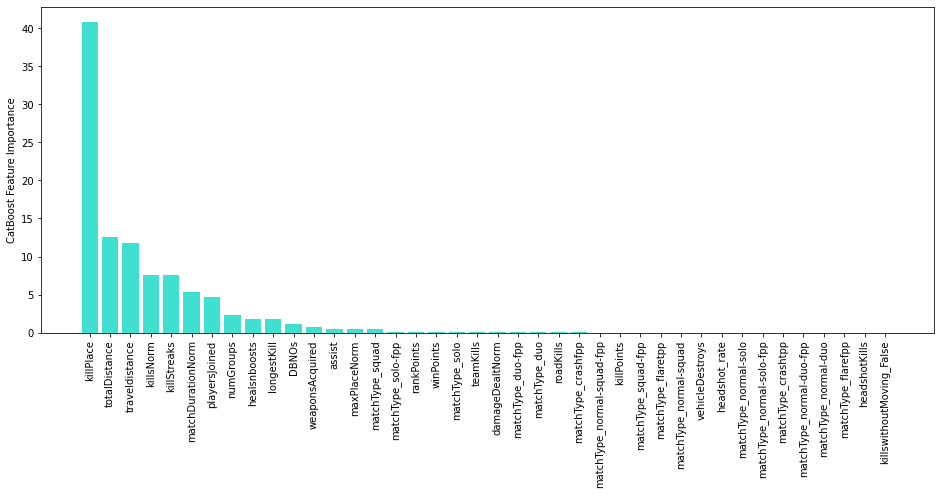

In [46]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

In [48]:
pred = model.predict(xtest)

In [49]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.08
R2: 0.93
